In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

# **Dataset**

In [3]:
import yfinance as yf

start = "2015-01-01"
end = "2025-01-01"
df = yf.download("AAPL", start=start, end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347174  24.817059  23.906238  24.805924  212818400
2015-01-05  23.661274  24.195741  23.474212  24.115571  257142000
2015-01-06  23.663500  23.924052  23.300507  23.725854  263188400
2015-01-07  23.995317  24.095529  23.761488  23.872835  160423600
2015-01-08  24.917259  24.975160  24.206864  24.324893  237458000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700


# **Indexing**

In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.471691
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.572422
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.583784
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.479061
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.467082


# **Close Price:**

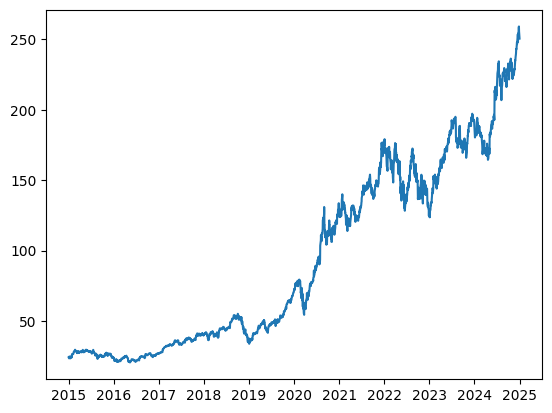

In [5]:
plt.plot(df.Close)

# **Close Price: Moving Avarge 100**

In [6]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2024-12-24,229.609709
2024-12-26,230.111926
2024-12-27,230.600197


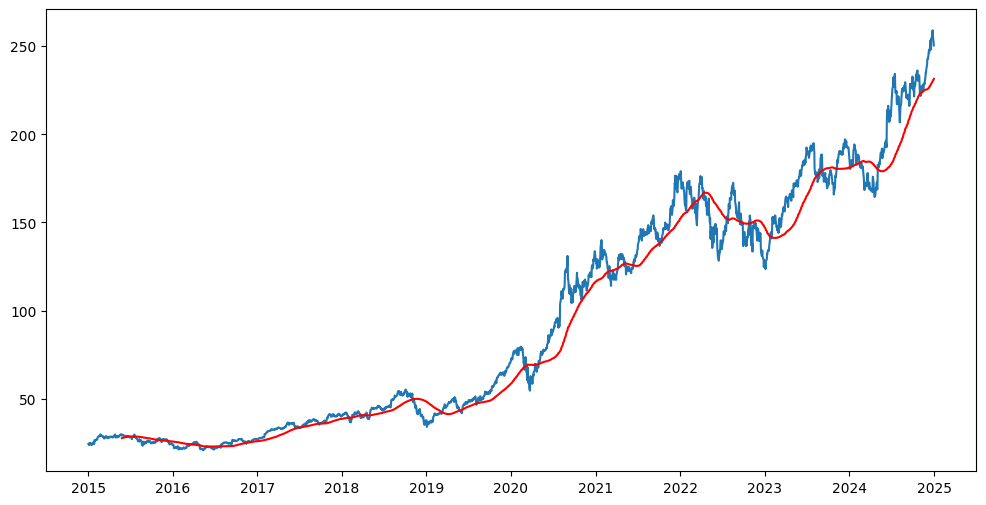

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

# **Close Price: Moving Avarge 200**


In [8]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
Date,
2015-01-02,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2024-12-24,211.414761
2024-12-26,211.846834
2024-12-27,212.272219


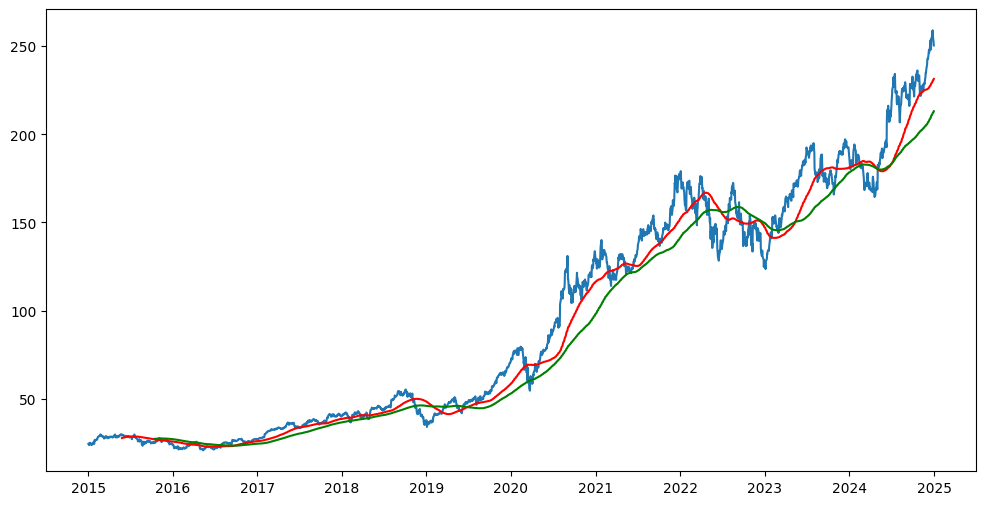

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [10]:
df.shape

(2516, 5)

# **Data Training and Testing**



In [11]:


data_training =pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [12]:
data_training.head()

Ticker,AAPL
Date,
2015-01-02,24.347174
2015-01-05,23.661274
2015-01-06,23.663500
2015-01-07,23.995317
2015-01-08,24.917259


In [13]:
data_testing.head()

Ticker,AAPL
Date,
2021-12-30,175.328018
2021-12-31,174.708160
2022-01-03,179.076569
2022-01-04,176.803818
2022-01-05,172.100861


# **Scaling down data (0,1)**


In [14]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:

data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.02328836],
       [0.01891194],
       [0.01892615],
       ...,
       [1.        ],
       [0.99347137],
       [0.99403625]])

In [16]:
data_training_array.shape

(1761, 1)

In [17]:


x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train),np.array(y_train)

In [18]:

x_train.shape

(1661, 100, 1)

# **ML Model**

In [19]:
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,
               input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))





model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))





model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


# dense layer
model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - loss: 0.0026
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 308ms/step - loss: 0.0021
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - loss: 0.0025
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - loss: 0.0021
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - loss: 0.0026
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - loss: 0.0024
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - loss: 0.0020
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - loss: 0.0027
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - loss: 0.0022
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - loss: 0.0023
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - loss: 0.0024
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 301ms/step - loss: 0.0022
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 301ms/step - loss: 0.0022
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - loss: 0.0024
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [24]:
model.save('keras.model.h5')


In [25]:


data_testing.head()


Ticker,AAPL
Date,
2021-12-30,175.328018
2021-12-31,174.708160
2022-01-03,179.076569
2022-01-04,176.803818
2022-01-05,172.100861


In [26]:
data_training.tail(100)

Ticker,AAPL
Date,
2021-08-09,143.526031
2021-08-10,143.044647
2021-08-11,143.300064
2021-08-12,146.276871
2021-08-13,146.483231
...,...
2021-12-22,172.809235
2021-12-23,173.438950
2021-12-27,177.423660


In [27]:
past_100_days= data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

Ticker,AAPL
0,143.526031
1,143.044647
2,143.300064
3,146.276871
4,146.483231


#**Scaler**

In [32]:
input_data =scaler.fit_transform(final_df)
input_data

array([[1.46392448e-01],
       [1.42834571e-01],
       [1.44722339e-01],
       [1.66723703e-01],
       [1.68248894e-01],
       [1.82916283e-01],
       [1.76163557e-01],
       [1.48352957e-01],
       [1.50821750e-01],
       [1.61641087e-01],
       [1.72678196e-01],
       [1.72024430e-01],
       [1.62875427e-01],
       [1.56921047e-01],
       [1.64618164e-01],
       [1.97438753e-01],
       [1.88071866e-01],
       [1.93009451e-01],
       [2.01287255e-01],
       [2.06006956e-01],
       [2.23361247e-01],
       [2.11888821e-01],
       [2.04336960e-01],
       [1.67304954e-01],
       [1.71516146e-01],
       [1.61132803e-01],
       [1.67740610e-01],
       [1.65997648e-01],
       [1.46174564e-01],
       [1.23519546e-01],
       [1.27077648e-01],
       [1.44649824e-01],
       [1.51765803e-01],
       [1.52419343e-01],
       [1.41164575e-01],
       [1.16040652e-01],
       [1.22720975e-01],
       [1.13063462e-01],
       [1.21413781e-01],
       [9.59270556e-02],


In [33]:
input_data.shape

(855, 1)

In [34]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


#**Making Predictions**


In [36]:

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


In [37]:
y_predicted.shape

(755, 1)

In [38]:
y_test

array([3.81438650e-01, 3.76857325e-01, 4.09143917e-01, 3.92346178e-01,
       3.57586959e-01, 3.36353266e-01, 3.37589523e-01, 3.37734892e-01,
       3.58750476e-01, 3.62022689e-01, 3.37734892e-01, 3.44134288e-01,
       3.20355113e-01, 2.94394839e-01, 2.81887235e-01, 2.66616605e-01,
       2.60871877e-01, 2.47491721e-01, 2.46837279e-01, 2.43419583e-01,
       3.24209480e-01, 3.56568925e-01, 3.55332668e-01, 3.64276981e-01,
       3.42897805e-01, 3.40786401e-01, 3.35471240e-01, 3.58552553e-01,
       3.69109797e-01, 3.38820592e-01, 3.13482281e-01, 3.15229867e-01,
       3.43698858e-01, 3.41951497e-01, 3.15229867e-01, 3.03725750e-01,
       2.82028319e-01, 2.51083431e-01, 2.70524202e-01, 2.85887309e-01,
       2.87853118e-01, 2.73873329e-01, 2.98337735e-01, 2.95935029e-01,
       2.73654768e-01, 2.45477305e-01, 2.31934300e-01, 2.72053115e-01,
       2.39797988e-01, 2.12202565e-01, 1.82277290e-01, 2.14823832e-01,
       2.47588709e-01, 2.55088241e-01, 2.79552647e-01, 2.89746187e-01,
      

In [39]:
y_predicted

array([[0.34894022],
       [0.35168013],
       [0.35479113],
       [0.35842213],
       [0.3623475 ],
       [0.36548454],
       [0.36682853],
       [0.36613643],
       [0.36365902],
       [0.36004382],
       [0.3560748 ],
       [0.3519064 ],
       [0.34769824],
       [0.34301972],
       [0.33708543],
       [0.3296188 ],
       [0.32111254],
       [0.31187928],
       [0.30253035],
       [0.2937943 ],
       [0.28623044],
       [0.28045958],
       [0.27716327],
       [0.2766534 ],
       [0.28037316],
       [0.28825185],
       [0.2991935 ],
       [0.3108443 ],
       [0.32178164],
       [0.3313882 ],
       [0.33883882],
       [0.3435057 ],
       [0.344931  ],
       [0.34383628],
       [0.34121805],
       [0.33726695],
       [0.33197293],
       [0.32530054],
       [0.31749976],
       [0.30892923],
       [0.30057403],
       [0.2932499 ],
       [0.28734237],
       [0.28295654],
       [0.2800712 ],
       [0.27829298],
       [0.27696133],
       [0.275

In [40]:
scaler.scale_


array([0.00739093])

In [41]:

scale_factor = 1/0.02099517
y_predicted =y_predicted*scale_factor
y_test =y_test*scale_factor

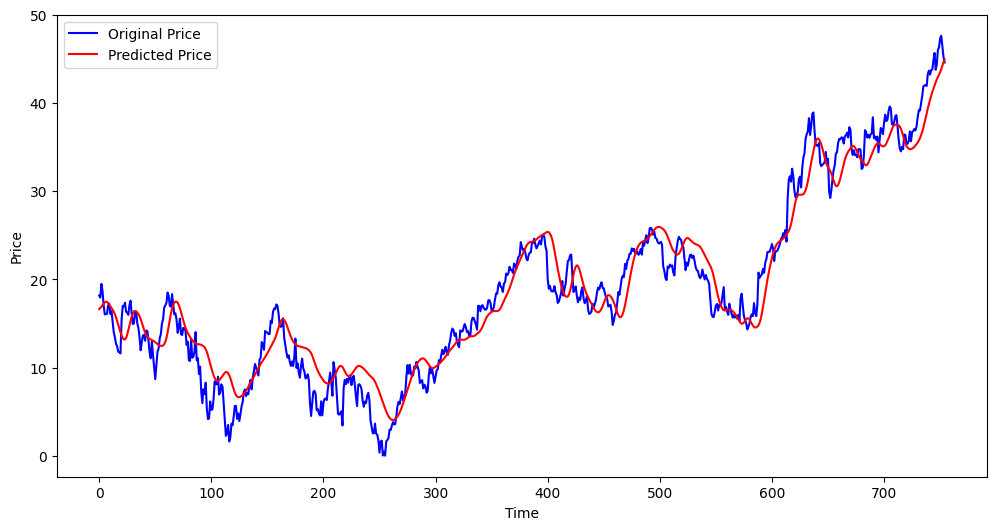

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()